<h1 > <center>                                      Course project 

<h2> 1 Import libraries</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from pandas import DataFrame
import scipy
import math
from numpy.random import randn
from statsmodels.stats.weightstats import ztest
from scipy import stats
%pylab inline
%config InlineBackend.figure_formats = ['svg']

Populating the interactive namespace from numpy and matplotlib


<h2> 2 Data importation 

In [3]:
data=pd.read_csv("C:/Users/chene/OneDrive/Bureau/heart.csv")
print(data.shape)
data.head(3)

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


<h1>  3 Explore my data

<h2> The initial plan for my data exploration


##### a) describe my data (count,mean,max,min.....)
##### b) check data type 
##### c) prepare plots to understand my data 

In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# 3.1 check data types

In [5]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
corr = data.corr()
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:ylabel='Frequency'>

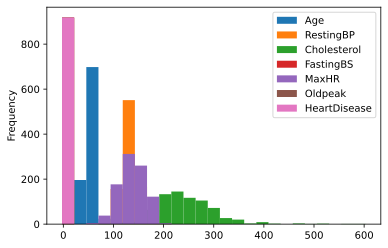

In [7]:
data.plot.hist(bins=25)

###### As we can see the higher correlation in this data is between the heart disease and the oldpeak (	0.403951)


<h2> 4 Cleaning and feature Engineering </h2>

#### 4.1 Missing Values

In [8]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Remarque : No missing values move on to outliers

#### 4.2 Discover outliers

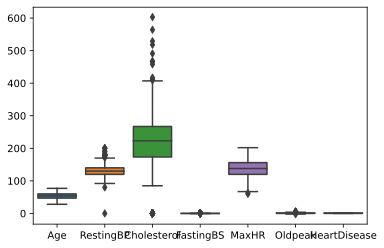

In [9]:

ax3=sns.boxplot(data=data)

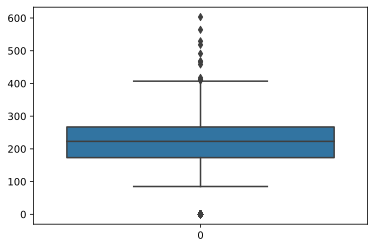

In [10]:
ax3=sns.boxplot(data=data['Cholesterol'])

###### I chose to remove cholestrol outliers because it is the perfect feature that removes the other features outliers

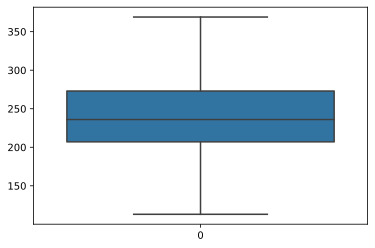

In [11]:
data=data.loc[(data['Cholesterol']>110) & (data['Cholesterol']<380) ]
ax3=sns.boxplot(data=data['Cholesterol'])

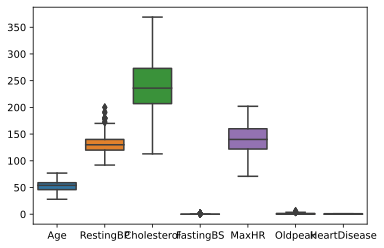

In [12]:
ax3=sns.boxplot(data=data)

In [13]:
#after we remove the outliers the shape change 
data.shape

(722, 12)

In [14]:
# Reset the index
data = data.reset_index()

<h2> 5 data transformation </h2> 

#### 5.1 Encoding (transform non numeric values ) </h3>

In [15]:
columns_Categ = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [16]:
New_Data = pd.get_dummies(data=data, columns=columns_Categ)
New_Data.shape
New_Data

,index,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,40,140,289,0,172,0.0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,1,49,160,180,0,156,1.0,1,1,0,...,1,0,0,1,0,1,0,0,1,0
2,2,37,130,283,0,98,0.0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
3,3,48,138,214,0,108,1.5,1,1,0,...,0,0,0,1,0,0,1,0,1,0
4,4,54,150,195,0,122,0.0,0,0,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,913,45,110,264,0,132,1.2,1,0,1,...,0,1,0,1,0,1,0,0,1,0
718,914,68,144,193,1,141,3.4,1,0,1,...,0,0,0,1,0,1,0,0,1,0
719,915,57,130,131,0,115,1.2,1,0,1,...,0,0,0,1,0,0,1,0,1,0
720,916,57,130,236,0,174,0.0,1,1,0,...,0,0,1,0,0,1,0,0,1,0


#### 5.2 data scaling </h3>

In [17]:
scaler = preprocessing.RobustScaler()
robust_arr = scaler.fit_transform(New_Data[['Cholesterol','RestingBP','MaxHR']])
robust_df= pd.DataFrame(robust_arr, columns =['Cholesterol2','RestingBP2','MaxHR2'])
robust_df

,Cholesterol2,RestingBP2,MaxHR2
0,0.803030,0.5,0.842105
1,-0.848485,1.5,0.421053
2,0.712121,0.0,-1.105263
3,-0.333333,0.4,-0.842105
4,-0.621212,1.0,-0.473684
...,...,...,...
717,0.424242,-1.0,-0.210526
718,-0.651515,0.7,0.026316
719,-1.590909,0.0,-0.657895
720,0.000000,0.0,0.894737


In [18]:
dataClean=pd.concat([New_Data,robust_df],axis=1)
print (dataClean.shape)
dataClean

(722, 25)


,index,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,...,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Cholesterol2,RestingBP2,MaxHR2
0,0,40,140,289,0,172,0.0,0,0,1,...,1,0,1,0,0,0,1,0.803030,0.5,0.842105
1,1,49,160,180,0,156,1.0,1,1,0,...,1,0,1,0,0,1,0,-0.848485,1.5,0.421053
2,2,37,130,283,0,98,0.0,0,0,1,...,0,1,1,0,0,0,1,0.712121,0.0,-1.105263
3,3,48,138,214,0,108,1.5,1,1,0,...,1,0,0,1,0,1,0,-0.333333,0.4,-0.842105
4,4,54,150,195,0,122,0.0,0,0,1,...,1,0,1,0,0,0,1,-0.621212,1.0,-0.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,913,45,110,264,0,132,1.2,1,0,1,...,1,0,1,0,0,1,0,0.424242,-1.0,-0.210526
718,914,68,144,193,1,141,3.4,1,0,1,...,1,0,1,0,0,1,0,-0.651515,0.7,0.026316
719,915,57,130,131,0,115,1.2,1,0,1,...,1,0,0,1,0,1,0,-1.590909,0.0,-0.657895
720,916,57,130,236,0,174,0.0,1,1,0,...,0,0,1,0,0,1,0,0.000000,0.0,0.894737


In [19]:
Drop_Columns = ['Cholesterol','RestingBP','MaxHR']
data_Final=dataClean.drop(Drop_Columns,axis=1)
data_Final

,index,Age,FastingBS,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Cholesterol2,RestingBP2,MaxHR2
0,0,40,0,0.0,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0.803030,0.5,0.842105
1,1,49,0,1.0,1,1,0,0,0,1,...,1,0,1,0,0,1,0,-0.848485,1.5,0.421053
2,2,37,0,0.0,0,0,1,0,1,0,...,0,1,1,0,0,0,1,0.712121,0.0,-1.105263
3,3,48,0,1.5,1,1,0,1,0,0,...,1,0,0,1,0,1,0,-0.333333,0.4,-0.842105
4,4,54,0,0.0,0,0,1,0,0,1,...,1,0,1,0,0,0,1,-0.621212,1.0,-0.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,913,45,0,1.2,1,0,1,0,0,0,...,1,0,1,0,0,1,0,0.424242,-1.0,-0.210526
718,914,68,1,3.4,1,0,1,1,0,0,...,1,0,1,0,0,1,0,-0.651515,0.7,0.026316
719,915,57,0,1.2,1,0,1,1,0,0,...,1,0,0,1,0,1,0,-1.590909,0.0,-0.657895
720,916,57,0,0.0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0.000000,0.0,0.894737


### 6 Key finding and insights </h2>

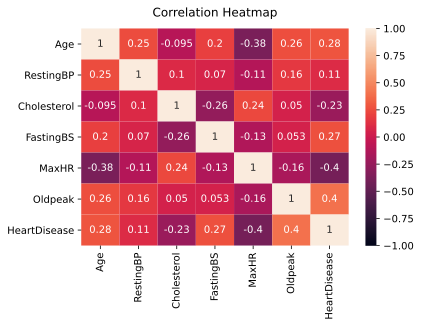

In [20]:
heatmap=sns.heatmap(corr, vmin=-1, vmax=1, annot=True);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

###### The features does not have significantly higher correlation with each other neither with the target 
###### The highest correlation is between the oldpeak and the heart disease (	0.403951)

<h2> 7 Hypothesis</h2>

<h3>7.1 

<h3>7.2

<h3>7.3

h0 : I claim that the average age of the people who get heart disease is 50 <br>
h1 : The average age of the people who get heart is > 50

In [21]:
ztest_Score, p_value= ztest(data_Final['Age'], value= 50)
print(p_value)
if p_value >= 0.05:
    print('H0 is proved')
else :
    print ('H1 is proved')

1.474372658965469e-15
H1 is proved


### Suggestions for next steps in analyzing data


> Would like to create models to uncover which feature is attributed most to Attrition
 also, Continue testing hypothesis to hone in on and uncover what the true indicators, along with their magnitude are for Attrition.

### Conclusion



>This data had no missing values , but a lot of outliers .
I think we need to add other features ( smoker , Poor diet ,Diabetes....)